In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

In [5]:
from narrative import nar181026_heat_confidence_genes

from narrative import nar181205_networks

In [6]:
from scipy.stats import spearmanr

In [7]:
from access_aging_data import standardizer as aging_standardizer

In [8]:
outfolder = '200902_vs_regressed'

In [9]:
save_images = True

In [10]:
ref_genes = standardizer.reference_genes(10090, 'orp')

In [11]:
pr = properties.genbank_validated_rna(10090)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])


In [12]:
from natsort import natsorted

In [13]:
all_de, detection, mice_in_comparisons, triplicate_series = nar181026_heat_confidence_genes.load_detection(
    detection_column='padj')

tissues_to_consider = ['BAT', 'Blood', 'GutEP', 'MuscSat', 'Adrenal', 'Kidney',
       'Heart', 'Liver', 'Skin', 'Stomach', 'Brain', 'SI',
       'LI', 'Cerebellum', 'WAT', 'Esophagus', 'Lung'] 


de_set = all_de[
    (all_de['tissue'].isin(tissues_to_consider)) & 
    (all_de['pfu']==0) &
    (all_de['younger']==4) &   
    (all_de['de_unit']=='both') & 
    (all_de['padj'].notnull()) &
    (all_de['gene_ncbi'].isin(ref_genes))

]

In [14]:
p_regressed = inout.get_internal_path(
    'dynamic/tstoeger/190403_cache_regressed_fold_change/regressed_fold_change.csv')

re_set = pd.read_csv(p_regressed)

In [15]:
re_set = re_set[
    (re_set['tissue'].isin(tissues_to_consider)) & 
    (re_set['pfu']==0) &
    (re_set['younger']==4) &   
    (re_set['de_unit']=='both') & 
    (re_set['padj'].notnull()) &
    (re_set['gene_ncbi'].isin(ref_genes))
]

In [16]:
re_set

,gene_ncbi,o_over_y,older,padj,pfu,pvalue,de_unit,tissue,younger,log_padj,log_pvalue,is_detected,condition,length,log_length,regressed
41083,654459.0,1.085148,18.0,0.988315,0.0,0.471879,both,MuscSat,4.0,0.005105,0.326169,True,MuscSat_0_4_18,297.0,2.472756,0.961589
41084,54127.0,-0.042244,18.0,0.999522,0.0,0.871714,both,MuscSat,4.0,0.000208,0.059626,True,MuscSat_0_4_18,328.0,2.515874,-0.162597
41085,67671.0,-0.153030,18.0,0.988315,0.0,0.609170,both,MuscSat,4.0,0.005105,0.215261,True,MuscSat_0_4_18,370.0,2.568202,-0.269520
41086,57294.0,-0.048214,18.0,0.999522,0.0,0.858458,both,MuscSat,4.0,0.000208,0.066281,True,MuscSat_0_4_18,370.0,2.568202,-0.164703
41087,100041579.0,-0.222602,18.0,0.999522,0.0,0.933853,both,MuscSat,4.0,0.000208,0.029721,True,MuscSat_0_4_18,377.0,2.576341,-0.338493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663075,13518.0,0.349119,12.0,0.771380,0.0,0.261256,both,WAT,4.0,0.112732,0.582934,True,WAT_0_4_12,20231.0,4.306017,0.389025
1663076,11426.0,0.419740,12.0,0.457482,0.0,0.030711,both,WAT,4.0,0.339626,1.512710,True,WAT_0_4_12,20454.5,4.310789,0.459679
1663077,319565.0,0.040146,12.0,0.970538,0.0,0.807947,both,WAT,4.0,0.012988,0.092617,True,WAT_0_4_12,21718.0,4.336820,0.080258
1663078,17996.0,-0.046055,12.0,0.992465,0.0,0.944469,both,WAT,4.0,0.003285,0.024812,True,WAT_0_4_12,22489.0,4.351970,-0.005847


In [17]:
renamer = {
        'Adrenal': 'Adrenal Gland', 
        'BAT': 'Brown adipose tissue', 
        'Blood': 'Blood', 
        'Brain': 'Frontal cortex', 
        'Esophagus': 'Esophagus', 
        'GutEP': 'Gut epithelium', 
        'Heart': 'Heart',
        'Kidney': 'Kidney', 
        'LI': 'Large intestine', 
        'Liver': 'Liver', 
        'Lung': 'Lung', 
        'MuscSat': 'Muscle', 
        'SI': 'Small intestine', 
        'Skin': 'Skin',
        'Stomach': 'Stomach', 
        'WAT': 'White adipose tissue', 
        'Cerebellum': 'Cerebellum'}

In [18]:
de_set['tissue'] = de_set['tissue'].replace(renamer)

/Users/tstoeger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
re_set['tissue'] = re_set['tissue'].replace(renamer)

In [20]:
re_set.head(2)

,gene_ncbi,o_over_y,older,padj,pfu,pvalue,de_unit,tissue,younger,log_padj,log_pvalue,is_detected,condition,length,log_length,regressed
41083,654459.0,1.085148,18.0,0.988315,0.0,0.471879,both,Muscle,4.0,0.005105,0.326169,True,MuscSat_0_4_18,297.0,2.472756,0.961589
41084,54127.0,-0.042244,18.0,0.999522,0.0,0.871714,both,Muscle,4.0,0.000208,0.059626,True,MuscSat_0_4_18,328.0,2.515874,-0.162597


In [21]:
from itertools import product

In [22]:
onditions = natsorted(de_set['condition'].unique())
ages = de_set['older'].unique()
out_orig = pd.DataFrame(index=renamer.values(), columns=ages)
out_regressed = pd.DataFrame(index=renamer.values(), columns=ages)


pvals_orig = pd.DataFrame(index=renamer.values(), columns=ages)
pvals_regressed = pd.DataFrame(index=renamer.values(), columns=ages)




for tissue, age in product(renamer.values(), ages):

    d = de_set[
        (de_set['older']==age) &
        (de_set['tissue']==tissue)
    ]

    d = d[['gene_ncbi', 'o_over_y']].dropna()
    d = pd.merge(d, pr)

    r, p = spearmanr(d['log_length'], d['o_over_y'])
    d = d.set_index('gene_ncbi')

    out_orig.loc[tissue, age] = r
    pvals_orig.loc[tissue, age] = p
    
    
    
    d = re_set[
        (re_set['older']==age) &
        (re_set['tissue']==tissue)
    ]

    d = d[['gene_ncbi', 'regressed']].dropna()
    d = pd.merge(d, pr)

    r, p = spearmanr(d['log_length'], d['regressed'])
    d = d.set_index('gene_ncbi')

    out_regressed.loc[tissue, age] = r
    pvals_regressed.loc[tissue, age] = p


    

In [23]:
out_orig

,18.0,12.0,9.0,24.0
Adrenal Gland,0.0600566,-0.0832552,-0.0036287,-0.162002
Brown adipose tissue,-0.0984448,0.0385048,-0.0153825,-0.334887
Blood,-0.188596,-0.0758902,-0.00730468,-0.646453
Frontal cortex,0.176835,0.231715,-0.0661702,0.193236
Esophagus,-0.0810182,-0.311499,-0.17002,-0.310671
Gut epithelium,-0.169653,-0.126086,-0.062721,-0.254853
Heart,0.526734,-0.155493,-0.262512,-0.199111
Kidney,0.250659,-0.281026,0.669455,-0.599801
Large intestine,-0.678338,-0.326627,-0.0305511,-0.522198
Liver,-0.113116,0.0517731,0.172214,-0.0708833


In [24]:
out_regressed

,18.0,12.0,9.0,24.0
Adrenal Gland,-0.00153213,-0.0462956,-0.00661573,-0.0229246
Brown adipose tissue,0.00554379,-0.00309115,-0.0058816,-0.00398561
Blood,0.0116373,0.00761499,0.0106699,0.00250458
Frontal cortex,-0.00248352,0.00292452,-0.00937462,-0.0380893
Esophagus,-0.00386367,0.000667653,0.0115188,-0.0103147
Gut epithelium,0.00133188,-0.0078631,0.000620407,-0.00470127
Heart,-0.00563028,0.00768709,-0.0177782,-0.0549309
Kidney,-0.0192885,-0.0101504,-0.0143024,0.00522464
Large intestine,0.00827132,-0.00276952,-0.0057656,-0.0020576
Liver,-0.0098969,0.00789618,-0.0116904,-0.00293615


In [25]:
pvals_regressed

,18.0,12.0,9.0,24.0
Adrenal Gland,0.877878,5.02924e-06,0.527619,0.0231438
Brown adipose tissue,0.617677,0.763588,0.537698,0.715326
Blood,0.263938,0.461078,0.305663,0.943825
Frontal cortex,0.791665,0.756032,0.316582,4.94878e-05
Esophagus,0.736606,0.957133,0.212486,0.396058
Gut epithelium,0.892122,0.400628,0.947164,0.670094
Heart,0.816029,0.41824,0.0607558,5.43016e-09
Kidney,0.047147,0.284277,0.185686,0.636245
Large intestine,0.44303,0.763147,0.530599,0.838557
Liver,0.309141,0.445546,0.221248,0.761878


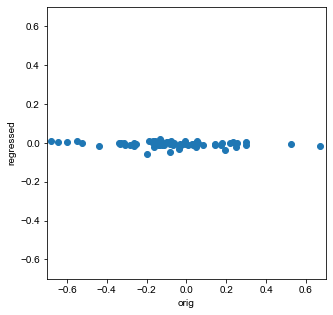

In [26]:
a = out_orig.stack().to_frame('value').rename_axis(['tissue', 'age'])
a.loc[:, 'origin'] = 'orig'
b = out_regressed.stack().to_frame('value').rename_axis(['tissue', 'age'])
b.loc[:, 'origin'] = 'regressed'

c = pd.merge(a.reset_index(), b.reset_index(), on=['tissue', 'age'], suffixes=(
'_orig', '_regressed'))

plt.figure(figsize=(5, 5))
plt.scatter(c['value_orig'], c['value_regressed'])
plt.xlabel('orig')
plt.ylabel('regressed')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

if save_images:
    export.export_image(
        '{}/after_regression.pdf'.format(
            outfolder))